In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
nobel = pd.read_csv('/content/nobel_prize_by_winner_utf8.csv')

In [24]:
nobel.head(10)

id         firstname     surname        born        died bornCountry  \
0  846            Elinor      Ostrom    8/7/1933   6/12/2012         USA   
1  846            Elinor      Ostrom    8/7/1933   6/12/2012         USA   
2  783      Wangari Muta     Maathai    4/1/1940   9/25/2011       Kenya   
3  230  Dorothy Crowfoot     Hodgkin   5/12/1910   7/29/1994       Egypt   
4  918            Youyou          Tu  12/30/1930  0000-00-00       China   
5  428           Barbara  McClintock   6/16/1902    9/2/1992         USA   
6  773            Shirin       Ebadi   6/21/1947  0000-00-00        Iran   
7  597            Grazia     Deledda  09/27/1871   8/15/1936       Italy   
8  615          Gabriela     Mistral  04/07/1889   1/10/1957       Chile   
9  782          Elfriede     Jelinek  10/20/1946  0000-00-00     Austria   

  bornCountryCode         bornCity     diedCountry diedCountryCode  \
0              US  Los Angeles, CA             USA              US   
1              US  Los Angeles, CA             USA              US   
2              KE            Nyeri           Kenya              KE   
3              EG            Cairo  United Kingdom              GB   
4              CN  Zhejiang Ningbo             NaN             NaN   
5              US     Hartford, CT             USA              US   
6              IR          Hamadan             NaN             NaN   
7              IT  Nuoro, Sardinia           Italy              IT   
8              CL           Vicu_a             USA              US   
9              AT     Môrzzuschlag             NaN             NaN   

            diedCity  gender  year    category overallMotivation  share  \
0    Bloomington, IN  female  2009   economics               NaN      2   
1    Bloomington, IN  female  2009   economics               NaN      2   
2            Nairobi  female  2004       peace               NaN      1   
3  Shipston-on-Stour  female  1964   chemistry               NaN      1   
4                NaN  female  2015    medicine               NaN      2   
5     Huntington, NY  female  1983    medicine               NaN      1   
6                NaN  female  2003       peace               NaN      1   
7               Rome  female  1926  literature               NaN      1   
8      Hempstead, NY  female  1945  literature               NaN      1   
9                NaN  female  2004  literature               NaN      1   

                                          motivation  \
0  "for her analysis of economic governance, espe...   
1  "for her analysis of economic governance, espe...   
2  "for her contribution to sustainable developme...   
3  "for her determinations by X-ray techniques of...   
4  "for her discoveries concerning a novel therap...   
5     "for her discovery of mobile genetic elements"   
6  "for her efforts for democracy and human right...   
7  "for her idealistically inspired writings whic...   
8  "for her lyric poetry which, inspired by power...   
9  "for her musical flow of voices and counter-vo...   

                                            name                    city  \
0                             Indiana University         Bloomington, IN   
1                       Arizona State University               Tempe, AZ   
2                                            NaN                     NaN   
3            University of Oxford, Royal Society                  Oxford   
4  China Academy of Traditional Chinese Medicine                 Beijing   
5                  Cold Spring Harbor Laboratory  Cold Spring Harbor, NY   
6                                            NaN                     NaN   
7                                            NaN                     NaN   
8                                            NaN                     NaN   
9                                            NaN                     NaN   

          country  
0             USA  
1             USA  
2             NaN  
3  United Kingdom  
4           Chin

In [25]:
# Convert the 'year' and 'share' columns to integer format to remove decimal points
nobel['year'] = pd.to_numeric(nobel['year'], errors='coerce').astype('Int64')
nobel['share'] = pd.to_numeric(nobel['share'], errors='coerce').astype('Int64')

# Display the last 20 rows to verify formatting
print(nobel.tail(20))

      id                                          firstname surname born died  \
952  797          International Atomic Energy Agency (IAEA)     NaN  NaN  NaN   
953  748                              United Nations (U.N.)     NaN  NaN  NaN   
954  564     International Campaign to Ban Landmines (ICBL)     NaN  NaN  NaN   
955  568                           M_decins Sans Frontires     NaN  NaN  NaN   
956  467  Institut de droit international (Institute of ...     NaN  NaN  NaN   
957  477  Bureau international permanent de la Paix (Per...     NaN  NaN  NaN   
958  482  Comit_ international de la Croix Rouge (Intern...     NaN  NaN  NaN   
959  482  Comit_ international de la Croix Rouge (Intern...     NaN  NaN  NaN   
960  482  Comit_ international de la Croix Rouge (Intern...     NaN  NaN  NaN   
961  503  Office international Nansen pour les R_fugi_s ...     NaN  NaN  NaN   
962  508              Friends Service Council (The Quakers)     NaN  NaN  NaN   
963  509   American Friends 

In [26]:
# Display descriptive statistics for all columns, including non-numerical ones
nobel.describe(include='all')

# Show the number of missing values in each column
nobel.isnull().sum()

id                     0
firstname              6
surname               36
born                  26
died                  26
bornCountry           32
bornCountryCode       32
bornCity              34
diedCountry          371
diedCountryCode      372
diedCity             377
gender                 0
year                   6
category               6
overallMotivation    956
share                  6
motivation            94
name                 252
city                 258
country              258
dtype: int64

In [27]:
# Convert all values to string, then replace missing values with 'NA'
nobel_str = nobel.astype(str).replace('nan', 'NA')

# Optional: check last 20 rows
print(nobel_str.tail(20))

      id                                          firstname surname born died  \
952  797          International Atomic Energy Agency (IAEA)      NA   NA   NA   
953  748                              United Nations (U.N.)      NA   NA   NA   
954  564     International Campaign to Ban Landmines (ICBL)      NA   NA   NA   
955  568                           M_decins Sans Frontires      NA   NA   NA   
956  467  Institut de droit international (Institute of ...      NA   NA   NA   
957  477  Bureau international permanent de la Paix (Per...      NA   NA   NA   
958  482  Comit_ international de la Croix Rouge (Intern...      NA   NA   NA   
959  482  Comit_ international de la Croix Rouge (Intern...      NA   NA   NA   
960  482  Comit_ international de la Croix Rouge (Intern...      NA   NA   NA   
961  503  Office international Nansen pour les R_fugi_s ...      NA   NA   NA   
962  508              Friends Service Council (The Quakers)      NA   NA   NA   
963  509   American Friends 

In [28]:
# Check for any remaining missing (NaN) values in each column
print("Missing values (NaN) per column:")
print(nobel_str.isnull().sum())

# Check for any empty strings (i.e. cells that contain "")
print("\nEmpty string values per column:")
print((nobel_str == '').sum())

# Check for cells that are neither 'NA' nor contain any actual data (e.g. just spaces)
print("\nCells that are NOT 'NA' and are still empty or just whitespace:")
for col in nobel_str.columns:
    count = ((nobel_str[col] != 'NA') & (nobel_str[col].str.strip() == '')).sum()
    if count > 0:
        print(f"{col}: {count} problematic cell(s)")

Missing values (NaN) per column:
id                   0
firstname            0
surname              0
born                 0
died                 0
bornCountry          0
bornCountryCode      0
bornCity             0
diedCountry          0
diedCountryCode      0
diedCity             0
gender               0
year                 0
category             0
overallMotivation    0
share                0
motivation           0
name                 0
city                 0
country              0
dtype: int64

Empty string values per column:
id                   0
firstname            0
surname              0
born                 0
died                 0
bornCountry          0
bornCountryCode      0
bornCity             0
diedCountry          0
diedCountryCode      0
diedCity             0
gender               0
year                 0
category             0
overallMotivation    0
share                0
motivation           0
name                 0
city                 0
country              0
d

In [29]:
# Separate columns by type
numeric_cols = nobel.select_dtypes(include=['number']).columns
categorical_cols = nobel.select_dtypes(include='object').columns

# Remove ID-like or irrelevant columns from numeric stats
numeric_cols = [col for col in numeric_cols if col not in ['id']]

# Generate targeted numeric statistics
print("\n Numeric summary statistics:")
print(nobel[numeric_cols].describe().round(0))

# Generate targeted categorical statistics
print("\n Categorical summary (top and unique counts):")
for col in categorical_cols:
    unique_vals = nobel[col].nunique()
    top_val = nobel[col].value_counts(dropna=False).idxmax()
    freq = nobel[col].value_counts(dropna=False).max()

    print(f"\nColumn: {col}")
    print(f" - Unique values: {unique_vals}")
    print(f" - Most frequent: {top_val} ({freq} times)")


 Numeric summary statistics:
       year  share
count   966    966
mean   1970      2
std      33      1
min    1901      1
25%    1947      1
50%    1976      2
75%    1999      3
max    2016      4

 Categorical summary (top and unique counts):

Column: firstname
 - Unique values: 789
 - Most frequent: Paul (9 times)

Column: surname
 - Unique values: 830
 - Most frequent: nan (36 times)

Column: born
 - Unique values: 858
 - Most frequent: nan (26 times)

Column: died
 - Unique values: 577
 - Most frequent: 0000-00-00 (334 times)

Column: bornCountry
 - Unique values: 121
 - Most frequent: USA (275 times)

Column: bornCountryCode
 - Unique values: 76
 - Most frequent: US (275 times)

Column: bornCity
 - Unique values: 600
 - Most frequent: New York, NY (48 times)

Column: diedCountry
 - Unique values: 50
 - Most frequent: nan (371 times)

Column: diedCountryCode
 - Unique values: 42
 - Most frequent: nan (372 times)

Column: diedCity
 - Unique values: 290
 - Most frequent: nan (377

<ipython-input-32-c42e93553000>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


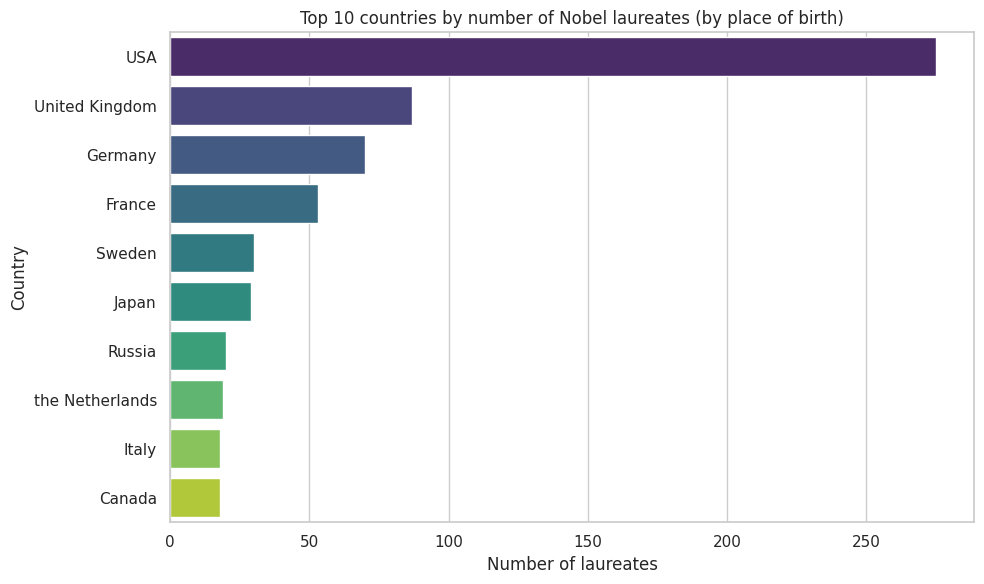

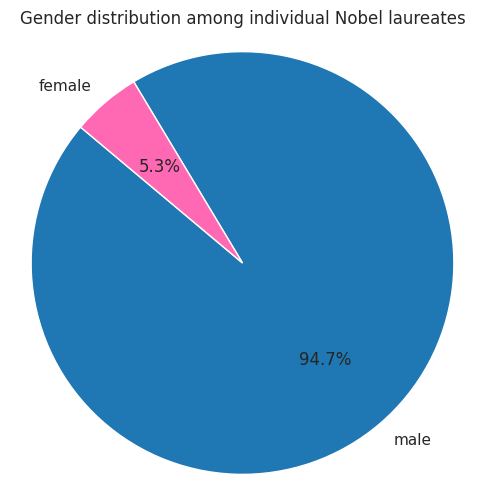

In [32]:
# Set a clean visual style
sns.set(style="whitegrid")

# Plot 1: Top 10 countries by laureate birth
top_countries = nobel['bornCountry'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 countries by number of Nobel laureates (by place of birth)")
plt.xlabel("Number of laureates")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Plot 2: Gender distribution (excluding organisations)
gender_counts = nobel[nobel['gender'].isin(['male', 'female'])]['gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts.values,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#1f77b4', '#ff69b4']  # blue for male, pink for female
)
plt.title("Gender distribution among individual Nobel laureates")
plt.axis('equal')
plt.show()